# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.
Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.
<br> </br>
Необходимо:
<br> </br>
1.Загрузить и изучить данные.
<br> </br>
2.Ответить на вопрос и обосновать решение.
 Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
 a. Изменится. Приведите примеры матриц.
 b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
<br> </br>
3.Предложить алгоритм преобразования данных для решения задачи. Обосновать, почему качество линейной регрессии не поменяется.
<br> </br>
4.Запрограммировать этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применить метрику R2.

###### 1. Загрузим и изучим данные

In [1]:
#Загрузим необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#Загрузим датасеты
try:
    data=pd.read_csv('C:/Users/ARTEM/Desktop/Project_DS/Линейная алгебра/insurance.csv')    
except:
    data=pd.read_csv('/datasets/insurance.csv')
    

In [3]:
#Изучим данные
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
#Изучим данные
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0


In [5]:
features = data.drop('Страховые выплаты', axis = 1)
target = data['Страховые выплаты']

###### Вывод
Данные не требуют предобработки, мы разделили датасет на тестовую и тренировочную выборку в соотношении 0.25:0.75

###### 2. Ответить на вопрос и обосновать решение.
 Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
 a. Изменится. Приведите примеры матриц.
 b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

In [6]:
#записываю формулу линейной регрессии с единичным столбцом:
X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1) 
y = target
w = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)
print('            Параметр w:', w[1:])

model = LinearRegression()                    
model.fit(features, target)
print('Оценочные коэффициенты:', model.coef_)


            Параметр w: [ 7.92580543e-03  3.57083050e-02 -1.70080492e-07 -1.35676623e-02]
Оценочные коэффициенты: [ 7.92580543e-03  3.57083050e-02 -1.70080492e-07 -1.35676623e-02]


###### Вывод: Параметр w и оценочные коэффициенты совпадают, значит качество линейной регрессии не изменяется.

In [7]:
#выведу результат исходной модели и новой
print(' R2 для исходных признаков:', r2_score(y, model.predict(features))) 

random = np.random.normal(size=(4,4)) 
np.linalg.inv(random)                 
features_new = features @ random      
linear_new = LinearRegression()               
linear_new .fit(features_new, target)          
print('R2 для измененных признаков:', r2_score(target, linear_new.predict(features_new)))

 R2 для исходных признаков: 0.4249455028666801
R2 для измененных признаков: 0.42494550286668253


###### Вывод:  R2 совпадает, следовательно линейная регрессия работает

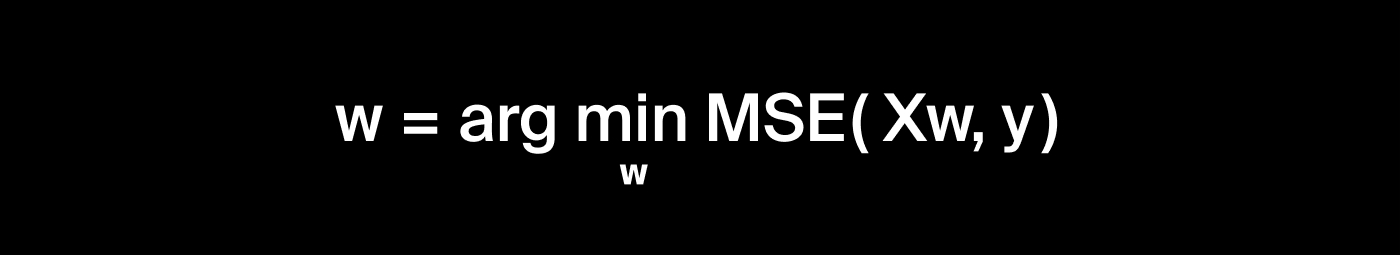

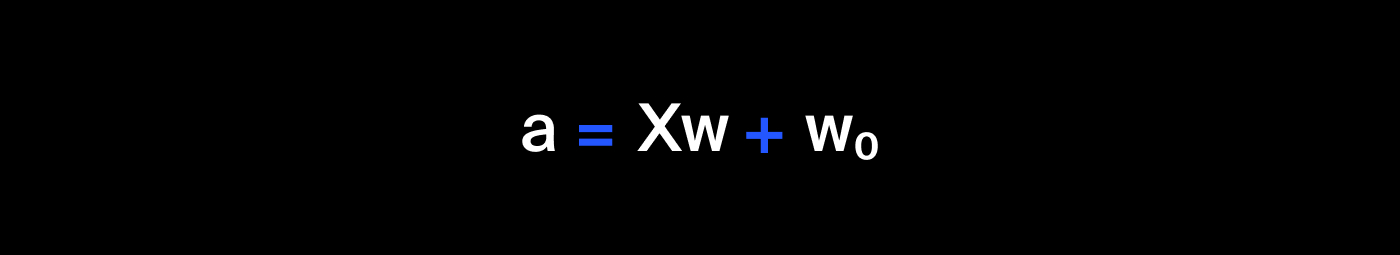

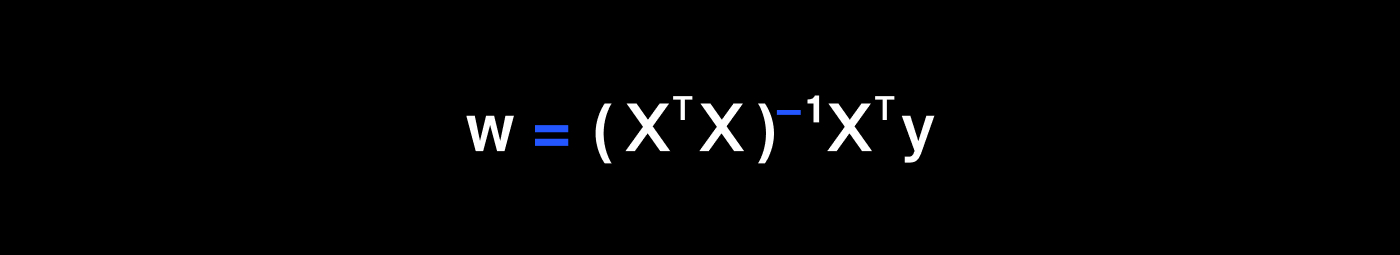

$$
X'=XP
$$

$$w'=(X'^TX')^{-1}X'^Ty$$

$$w'=((XP)^TXP)^{-1}(XP)^{T}y$$

$$w'=(P^T(X^TX)P)^{-1}(XP)^Ty$$

$$w'=(P^T(X^TX)P)^{-1}P^TX^Ty$$

$$w'=P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty $$

$$w'=P^{-1}(X^TX)^{-1}EX^Ty $$

$$w'=P^{-1}w$$


Тоже самое, для формулы $a'=X'w'$, подставив получившиеся значения получим $X'=XP$ и $w'=p^{-1}w$, в итоге:
$$a'=XPP^{-1}w$$
$$a'=Xw$$

###### 3. Предложить алгоритм преобразования данных для решения задачи. Обосновать, почему качество линейной регрессии не поменяется.


Будет необходимо:

-сгенерировать обратимую матрицу, размерностью соответствующую количеству столбцов признаков, а это 4х4.

-умножить матрицу исходных признаков на сгенерированную матрицу.

-посчитать качество модели на полученной матрице и сравнить с качеством модели на матрице исходных данных.

###### 4. Запрограммировать этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применить метрику R2.

In [8]:
#Используем алгоритм и попробуем расчитать R2 score после изменений
model = LinearRegression()               
model.fit(features_new, target)          
print('R2 score:',r2_score(target,model.predict(features_new))) 

R2 score: 0.42494550286668253


###### Вывод
R2 score на преобразованных данных совпадает с r2 исходных данных, следовательно, алгоритм справляется с защитой данных